## Purpose: Etalon fitting example

Demonstration: 
    1. Etalon Model
    2. Parameter fit
    3. Autoscaling, Chisq, Standard deviations
    4. Confidence region for the fit

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from EtalonModel import EtalonModel
from LevenbergMarquardtFitter import LevenbergMarquardtFitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

define some constants

In [13]:
N = 101
sig = 0.1

make a 3-degree polynomial

In [14]:
x = numpy.linspace( -2.0, 2.0, N, dtype=float )
sx = numpy.sin( 6 * x )
ym = 1.3 / ( 1.0 + 0.3 * sx * sx )

y = ym + sig * numpy.random.randn( N )


Define the model

In [37]:
mdl = EtalonModel()

print( mdl )
print( fmt( mdl.parameters ) ) 

Etalon: f( x:p ) = p_0 / ( 1 + p_1 * sin^2( PI * x * p_2 + p_3 ) )
[    1.000    1.000    1.000    0.000]


define the fitter: Fitter

In [38]:
fitter = LevenbergMarquardtFitter( x, mdl )
 
# find the parameters
param = fitter.fit( y )

  

In [39]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    1.086   -0.076    0.950   -0.077]
StDevs     : [    0.024    0.032    0.057    0.211]
Chisq      :     1.820
Scale      :     0.137
Evidence   :   -50.155
Covar matrix :
[[    0.001    0.001    0.000   -0.000]
 [    0.001    0.001    0.000   -0.000]
 [    0.000    0.000    0.003   -0.000]
 [   -0.000   -0.000   -0.000    0.045]]


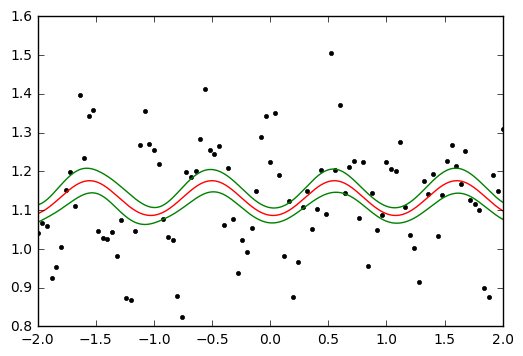

In [40]:
plotFit( x, y, mdl, ftr=fitter )

That was not very successful. The initial parameters and in particular parameter 2 (the frequency) is not close enough to the real value. The fitter ended in a local minimum.

Try it again starting with an initial frequency of 2. 

In [33]:
mdl.parameters = [1.0, 1.0, 2.0, 0.0]
param = fitter.fit( y )

In [34]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    1.289    0.283    1.894    0.027]
StDevs     : [    0.019    0.031    0.013    0.048]
Chisq      :     0.923
Scale      :     0.098
Evidence   :   -50.743
Covar matrix :
[[    0.000    0.000   -0.000   -0.000]
 [    0.000    0.001    0.000   -0.000]
 [   -0.000    0.000    0.000   -0.000]
 [   -0.000   -0.000   -0.000    0.002]]


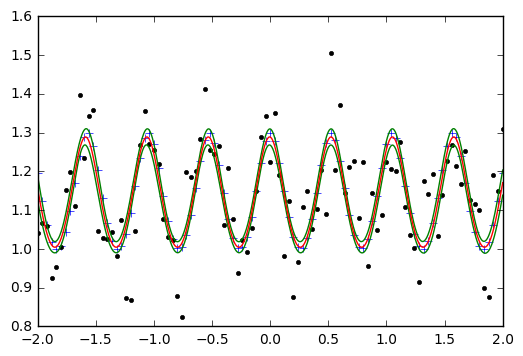

In [35]:
plotFit( x, y, mdl, ftr=fitter, truth=ym )